# Manpreet Dhindsa, Ahmed Bahyal - COMP 542 - Income Prediction

In [3]:
# Load data using Pandas
import pandas as pd
import os
def load_adult_data(path=r"C:\Users\mdhindsa\Documents\CSUN\Fall2023\COMP_542\Project\dataset"):
    csv_path = os.path.join(path, "adult.csv")
    return pd.read_csv(csv_path)
adult = load_adult_data()

In [3]:
# a) How many tuples does the adult data set have? (Check out the data frame)
num_tuples, num_columns = adult.shape
print("Number of tuples (rows) in the adult dataset:", num_tuples)

Number of tuples (rows) in the adult dataset: 32561


In [9]:
# Grab one row/tuple
first_row = adult.iloc[0]
print(first_row)

age                          39
workclass             State-gov
fnlwgt                    77516
education             Bachelors
education_num                13
marital_status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capital_gain               2174
capital_loss                  0
hours_per_week               40
native_country    United-States
target                    <=50K
Name: 0, dtype: object


In [7]:
# b) How many features does the adult data set have? Print a name list.
feature_names = adult.columns[:-1] 
print("Number of features in the adult dataset: " + str(len(feature_names)))
print("Features in the adult dataset: " + str(feature_names.to_list()))

Number of features in the adult dataset: 14
Features in the adult dataset: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']


In [5]:
# c) What’s the data type for each feature?
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# d) How many of each target do you have?
print("Count of each target in the adult dataset: " + str(adult['target'].value_counts()))

Count of each target in the adult dataset: target
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [7]:
# e) What’s the mean, median, quantiles and range (max-min)?
numeric_columns = adult[['age', 'capital_gain', 'capital_loss', 'hours_per_week']]
measurements = numeric_columns.describe()
ranges = numeric_columns.max() - numeric_columns.min()
medians = numeric_columns.median()
measurements.loc['range'] = ranges
measurements.loc['median'] = medians
print(measurements)

                 age  capital_gain  capital_loss  hours_per_week
count   32561.000000  32561.000000  32561.000000    32561.000000
mean       38.581647   1077.648844     87.303830       40.437456
std        13.640433   7385.292085    402.960219       12.347429
min        17.000000      0.000000      0.000000        1.000000
25%        28.000000      0.000000      0.000000       40.000000
50%        37.000000      0.000000      0.000000       40.000000
75%        48.000000      0.000000      0.000000       45.000000
max        90.000000  99999.000000   4356.000000       99.000000
range      73.000000  99999.000000   4356.000000       98.000000
median     37.000000      0.000000      0.000000       40.000000


<Axes: xlabel='education_num', ylabel='hours_per_week'>

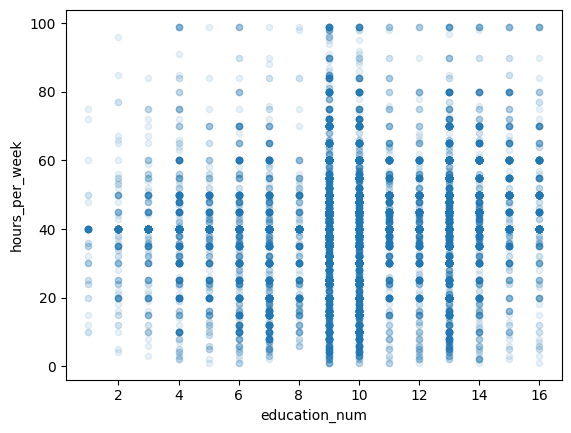

In [9]:
# f) Make a scatter plot of previous_qualification_grade vs admission_grade.
adult.plot(kind="scatter", x="education_num", y="hours_per_week", alpha=0.1)

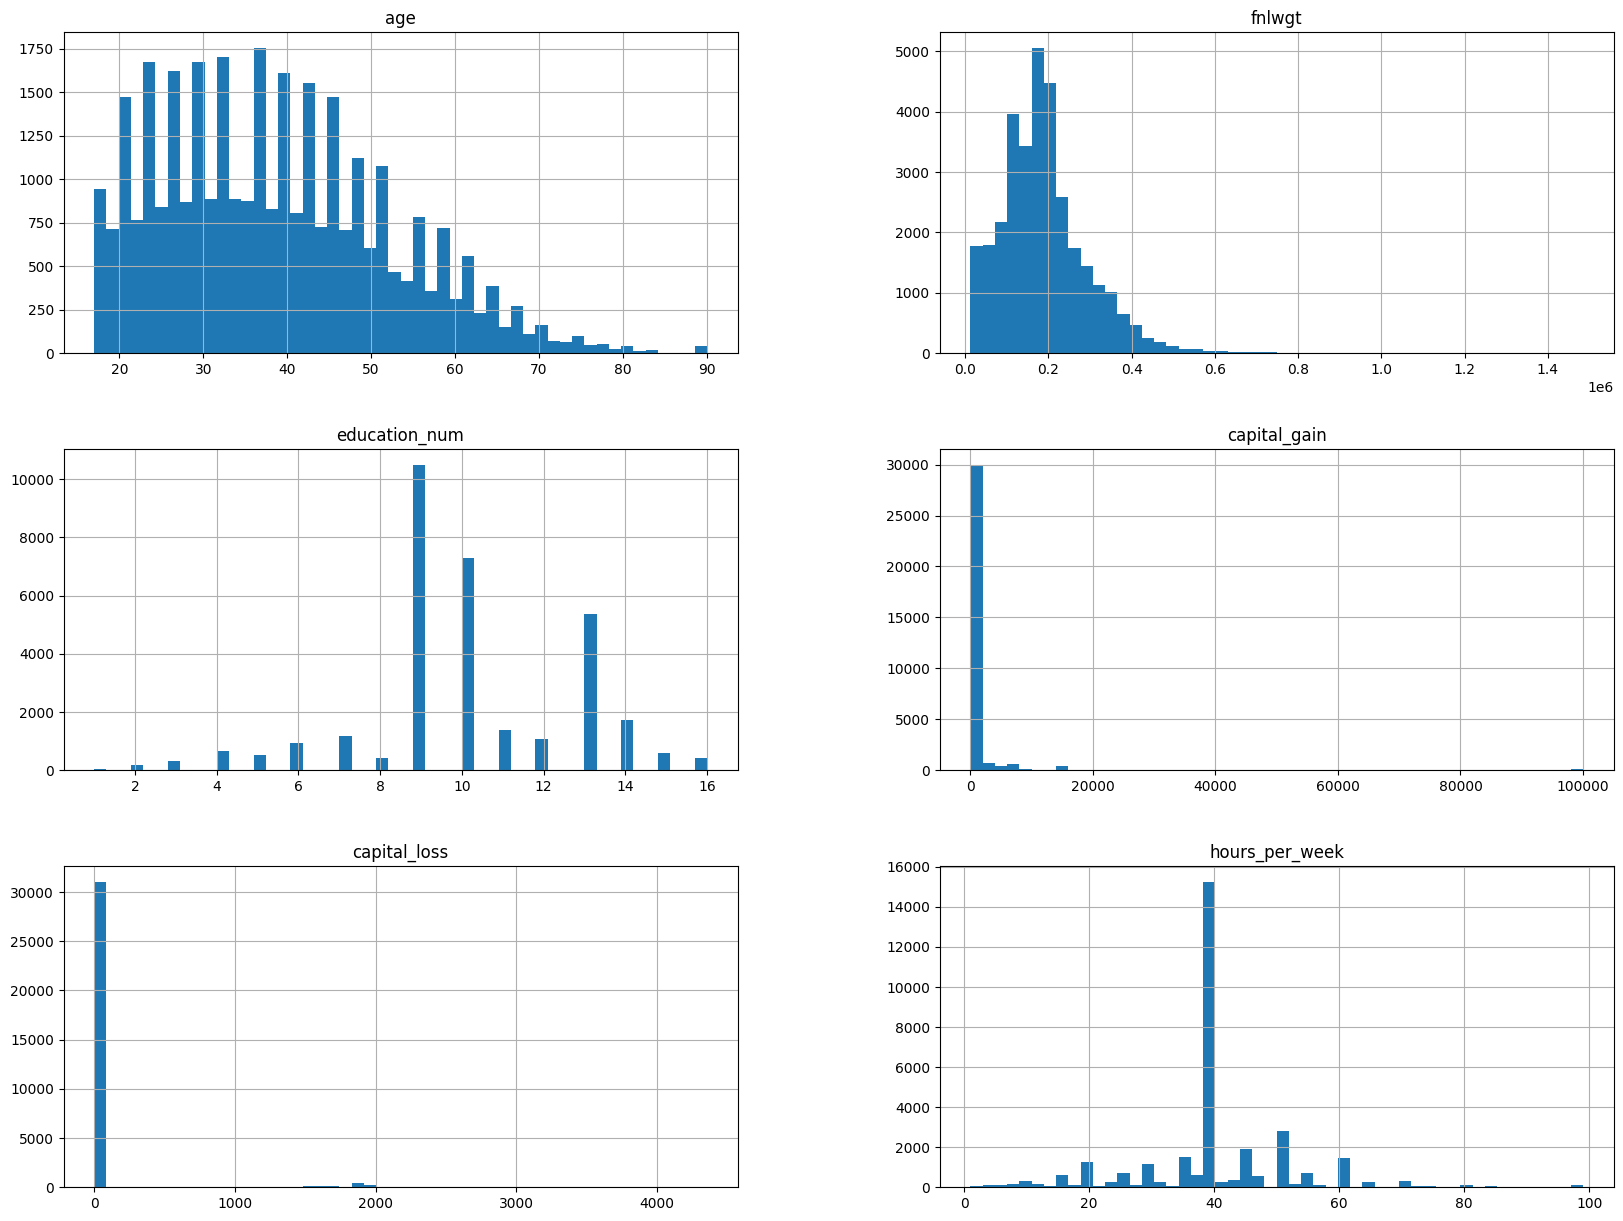

In [10]:
# g) Create four individual histogram plots in a single figure, where each plot contains one feature.
%matplotlib inline 
import matplotlib.pyplot as plt
adult.hist(bins=50, figsize=(20,15))
plt.show()

array([[<Axes: title={'center': 'age'}, xlabel='[target]'>,
        <Axes: title={'center': 'capital_gain'}, xlabel='[target]'>],
       [<Axes: title={'center': 'capital_loss'}, xlabel='[target]'>,
        <Axes: title={'center': 'education_num'}, xlabel='[target]'>],
       [<Axes: title={'center': 'fnlwgt'}, xlabel='[target]'>,
        <Axes: title={'center': 'hours_per_week'}, xlabel='[target]'>]],
      dtype=object)

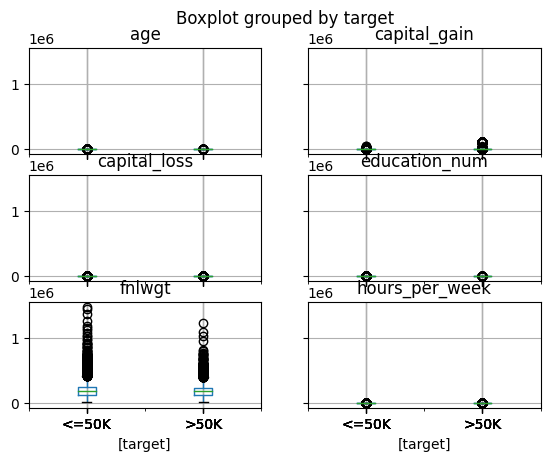

In [11]:
# h) Create four individual boxplots in a single figure, where each plot contains one feature.
adult.boxplot(by='target')

array([[<Axes: xlabel='age', ylabel='age'>]], dtype=object)

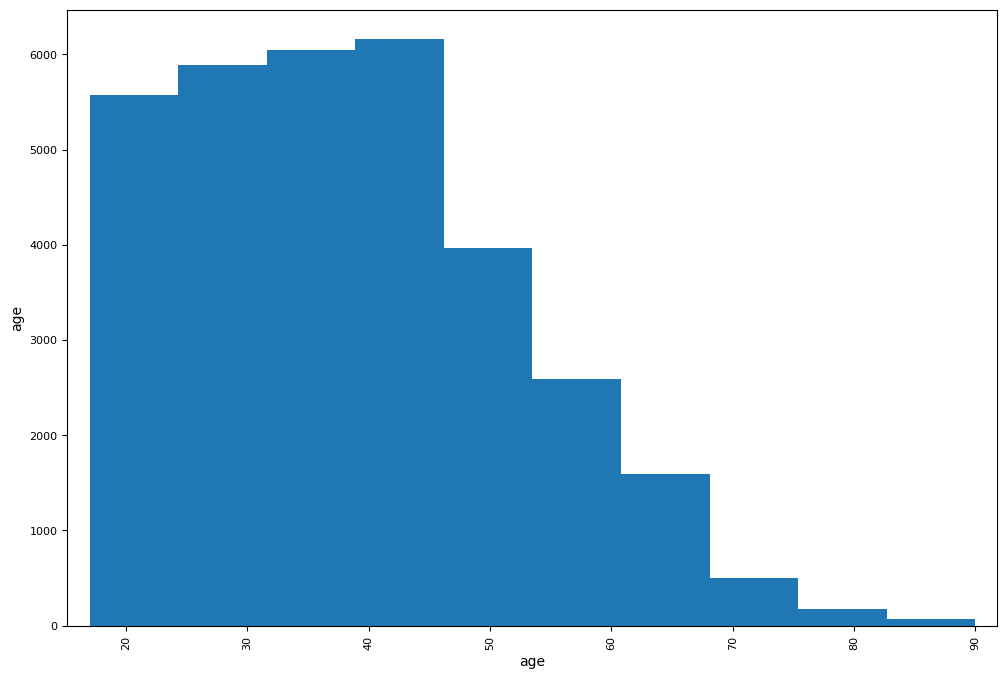

In [13]:
# i) Make a scatter plot matrix to examine the correlation between previous_qualification_grade and admission_grade.
import pandas
from pandas.plotting import scatter_matrix
attributes = ["age", "native_country"]
scatter_matrix(adult[attributes], figsize=(12, 8))

In [3]:
missing_values = adult.isna().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


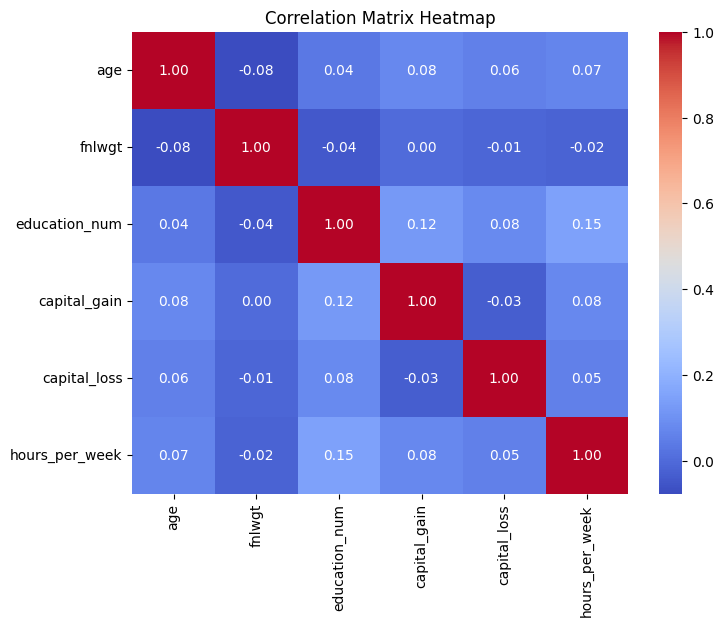

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
numeric_columns = adult.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


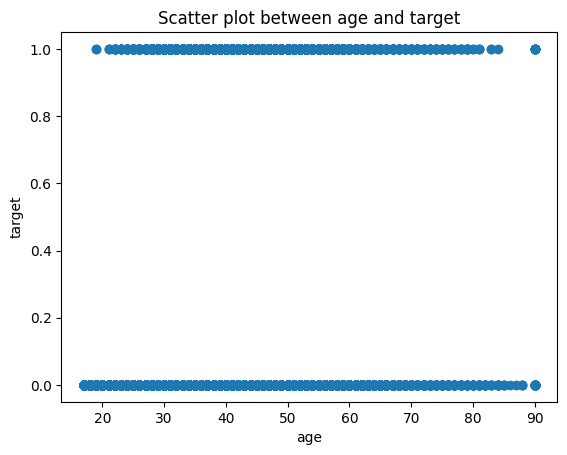

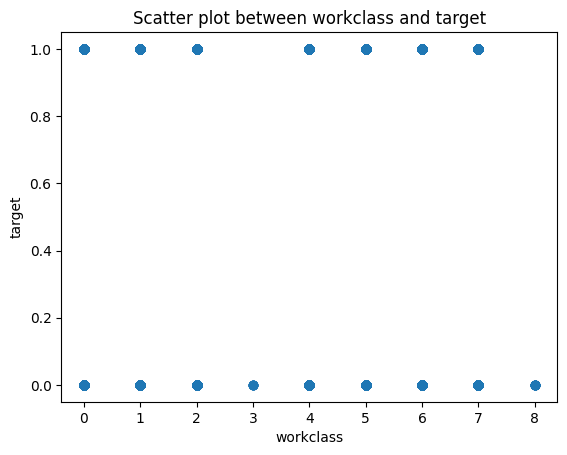

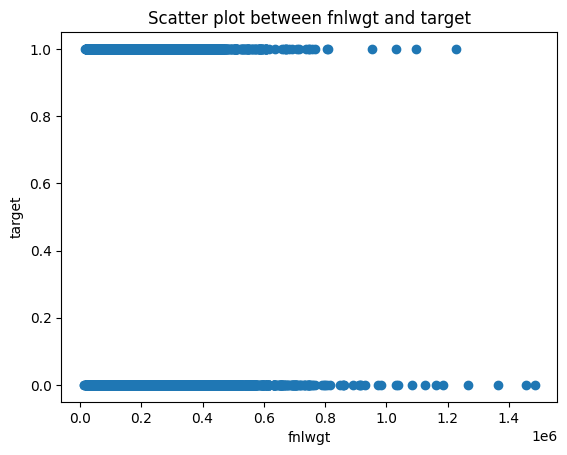

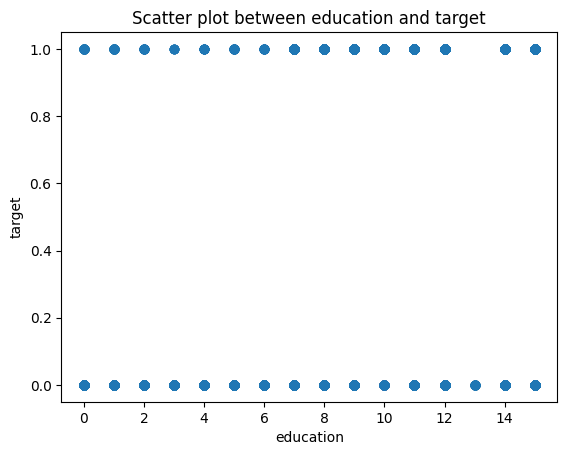

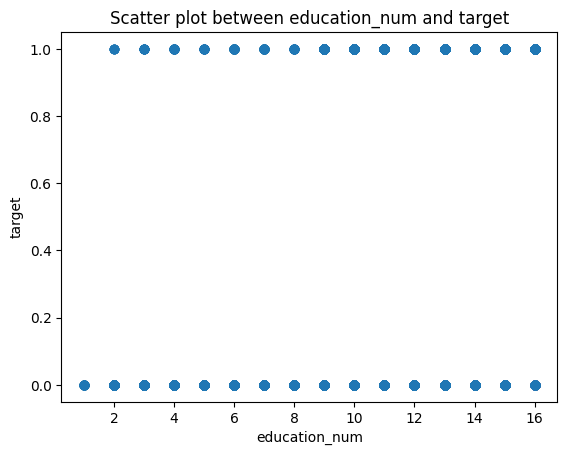

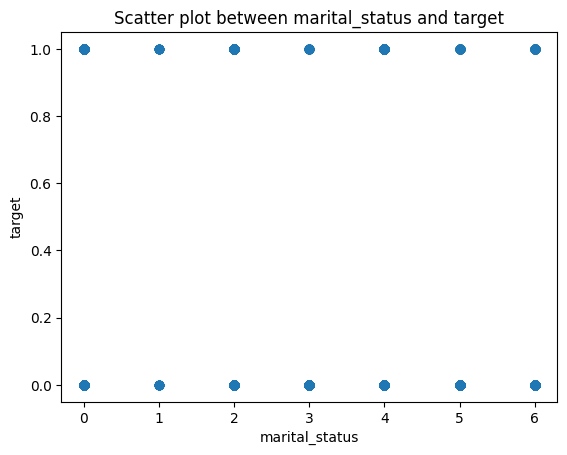

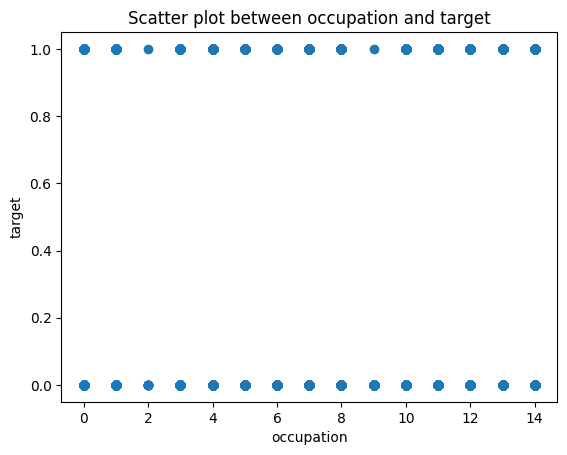

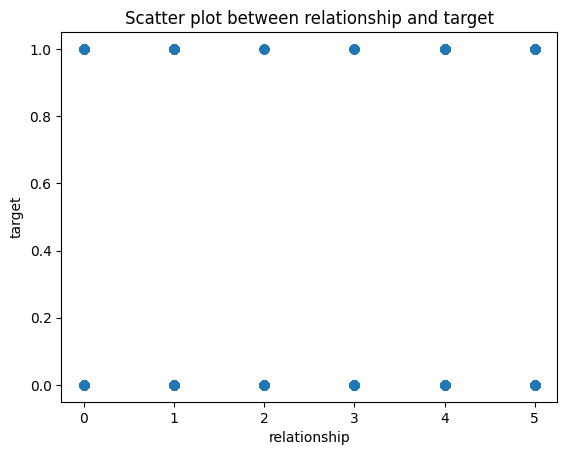

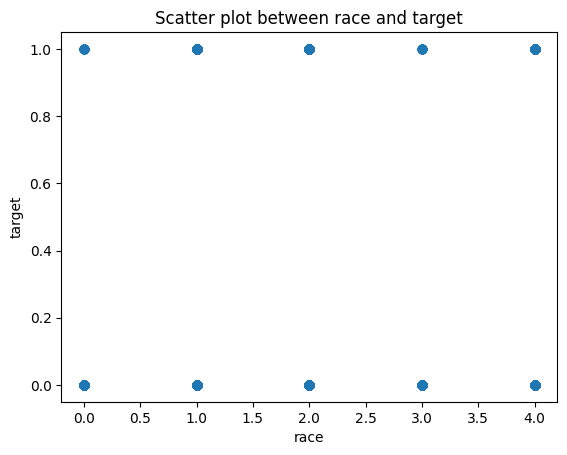

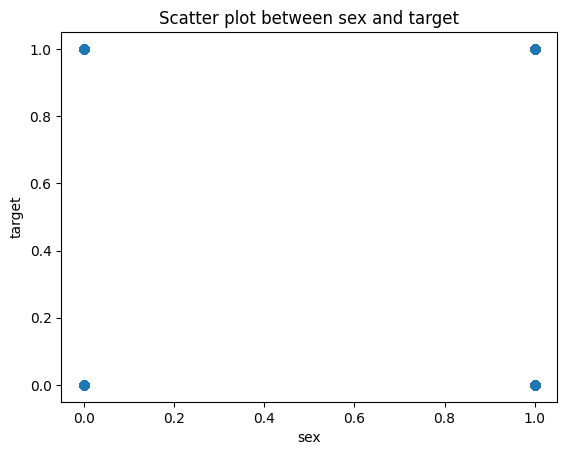

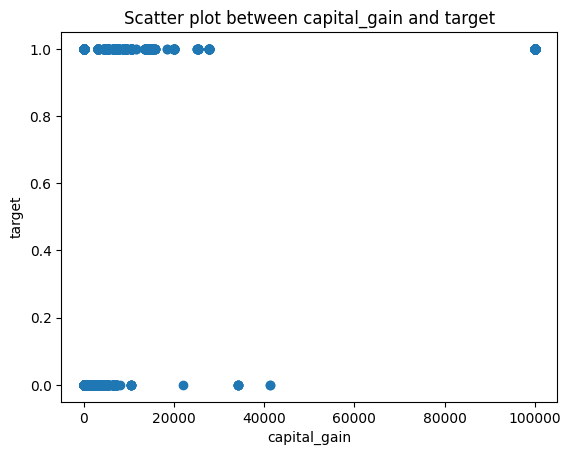

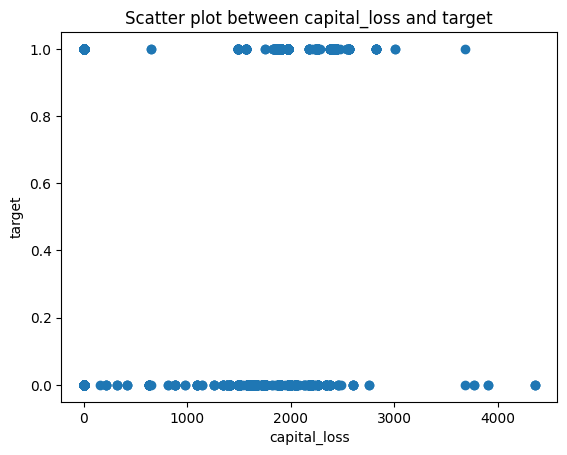

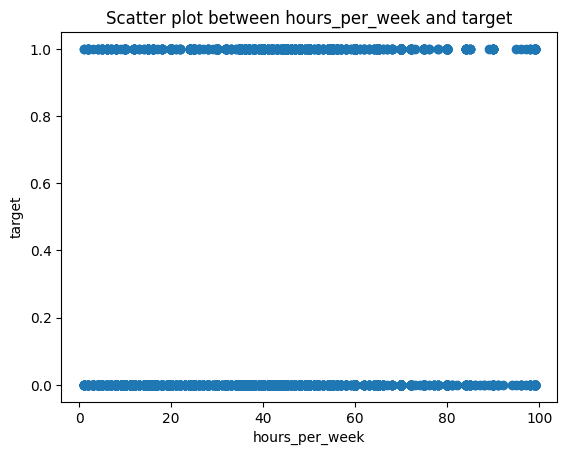

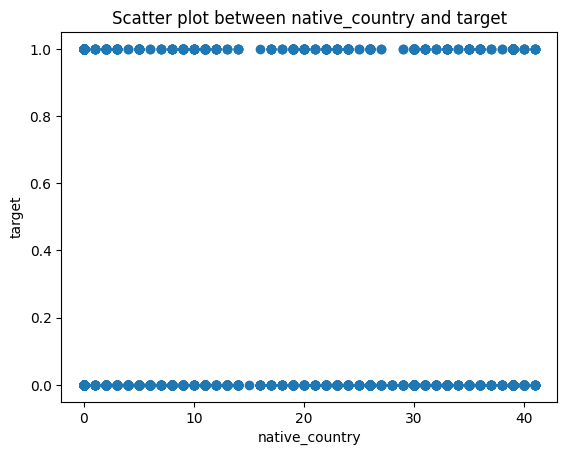

In [6]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

object_attributes = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "target"]

label_encoder = LabelEncoder()

for column in object_attributes:
    if column in adult.columns:
        adult[column] = label_encoder.fit_transform(adult[column])

correlations = adult.corr()
target_variable = 'target' 

for column in adult.columns:
    if column != target_variable:  # Skip plotting the target variable against itself
        plt.scatter(adult[column], adult[target_variable])
        plt.xlabel(column)
        plt.ylabel(target_variable)
        plt.title(f'Scatter plot between {column} and {target_variable}')
        plt.show()


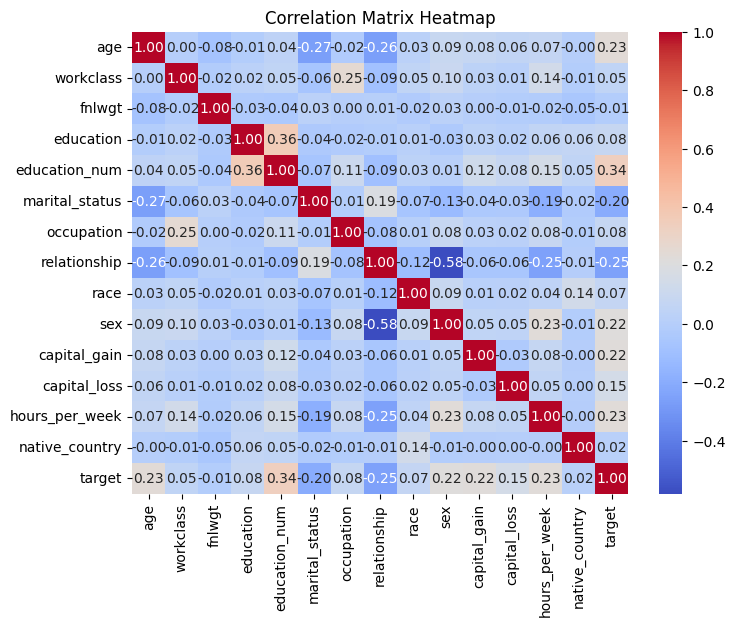

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

object_attributes = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "target"]

label_encoder = LabelEncoder()

for column in object_attributes:
    if column in adult.columns:
        adult[column] = label_encoder.fit_transform(adult[column])

# Calculate the correlation matrix
correlation_matrix = adult.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [5]:
# Feature Engineering, drop the attributes/columns that are not needed
print(adult.columns)

# Drop columns if they exist
columns_to_drop = ['native_country', 'fnlwgt']
if all(col in adult.columns for col in columns_to_drop):
    adult = adult.drop(columns_to_drop, axis=1)
else:
    print("Columns not found in the DataFrame.")

print(adult.columns)

# Grab one row/tuple
first_row = adult.iloc[0]
print(first_row)

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'target'],
      dtype='object')
Columns not found in the DataFrame.
Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'target'],
      dtype='object')
age                          39
workclass             State-gov
education             Bachelors
education_num                13
marital_status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capital_gain               2174
capital_loss                  0
hours_per_week               40
target                    <=50K
Name: 0, dtype: object


In [6]:
# Idea from professor - Check if the dataset is imbalanced, resolve this issue
target_counts = adult['target'].value_counts()
print(target_counts)

target
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [7]:
# Random Oversampling - Fixes the imbalance
import pandas as pd
from sklearn.utils import resample

# Separate the two classes
df_less_than_50k = adult[adult['target'] == '<=50K']
df_greater_than_50k = adult[adult['target'] == '>50K']

# Oversample the ">50K" class
df_greater_than_50k_oversampled = resample(df_greater_than_50k, 
                                           replace=True,  # With replacement
                                           n_samples=len(df_less_than_50k),  # Match the count of the majority class
                                           random_state=42)  # Set a random seed for reproducibility

# Concatenate the oversampled ">50K" class with the "<=50K" class
adult_balanced = pd.concat([df_less_than_50k, df_greater_than_50k_oversampled])

# Verify the new fixed df
target_counts = adult_balanced['target'].value_counts()
print(target_counts)


target
<=50K    24720
>50K     24720
Name: count, dtype: int64
